# Data Preprocessing
**By: M. Alwi Sukra**

Preprocess transformed data until prepared for machine learning algorithm

#### import useful libraries

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import time
from collections import deque

#### get transformed data

In [54]:
df = pd.read_csv("transformed_data/1592258074.4628286-preprocessed_data.csv", index_col=False)

In [55]:
df.head()

,frame,subject,class_label,rEar_norm,lEar_norm,mar_norm,calc_eye_state,calc_mouth_state,perclos,microsleep_rate,yawning_rate,mean_rEar,mean_lEar,mean_mar,std_rEar,std_lEar,std_mar
0,4484,1,0,0.522064,0.441550,0.125197,1,0,0.031452,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
1,4485,1,0,0.518227,0.430843,0.122614,1,0,0.031452,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
2,4486,1,0,0.470524,0.406359,0.118601,1,0,0.031452,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
3,4487,1,0,0.530129,0.420594,0.121653,1,0,0.031229,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
4,4488,1,0,0.501878,0.396268,0.118319,1,0,0.031229,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271


In [56]:
df_identical = pd.read_csv("transformed_data/1592258075.9017363-identical_fps-preprocessed_data.csv", index_col=False)

In [57]:
df_identical.head()

,frame,subject,class_label,rEar_norm,lEar_norm,mar_norm,calc_eye_state,calc_mouth_state,perclos,microsleep_rate,yawning_rate,mean_rEar,mean_lEar,mean_mar,std_rEar,std_lEar,std_mar
0,4321,1,0,0.493253,0.405955,0.076367,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
1,4324,1,0,0.500934,0.410642,0.069909,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
2,4327,1,0,0.518284,0.406638,0.081775,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
3,4330,1,0,0.505704,0.395426,0.070798,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
4,4333,1,0,0.493350,0.389041,0.070185,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271


## Balancing Data

Balance both original fps and identical fps data so that **for each subject has the same amount of data class 0 and class 1**

#### get fps info

In [58]:
FPS_PATH = "D:/datasets/ngantuk/fps_info.txt"

In [59]:
df_fps = pd.read_csv(FPS_PATH, names=['subject','class_label','fps'], delimiter=';', index_col=False)
df_fps.head()

,subject,class_label,fps
0,1,0,24.91
1,1,1,24.91
2,2,0,30.00
3,2,1,30.00
4,3,0,30.03


Get data **just for the first 2 minutes**

In [60]:
MINUTES_LENGTH = 2

#### normal data

In [61]:
dfs_balanced = []

In [62]:
for subject, df_subject in df.groupby('subject'):
    min_fps = min(df_fps.loc[(df_fps['subject'] == subject)]['fps'].values)
    window_size = int(min_fps * 60 * MINUTES_LENGTH) + 1
    for class_label, df_class in df_subject.groupby('class_label'):
        _df = pd.DataFrame(df_class).reset_index(drop=True)
        dfs_balanced.append(_df.iloc[:window_size])

In [63]:
df_balanced = pd.concat(dfs_balanced)

In [64]:
df_balanced.head()

,frame,subject,class_label,rEar_norm,lEar_norm,mar_norm,calc_eye_state,calc_mouth_state,perclos,microsleep_rate,yawning_rate,mean_rEar,mean_lEar,mean_mar,std_rEar,std_lEar,std_mar
0,4484,1,0,0.522064,0.441550,0.125197,1,0,0.031452,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
1,4485,1,0,0.518227,0.430843,0.122614,1,0,0.031452,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
2,4486,1,0,0.470524,0.406359,0.118601,1,0,0.031452,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
3,4487,1,0,0.530129,0.420594,0.121653,1,0,0.031229,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
4,4488,1,0,0.501878,0.396268,0.118319,1,0,0.031229,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271


In [66]:
df_balanced.groupby('class_label').count()['frame']

class_label
0    28267
1    28267
Name: frame, dtype: int64

#### fps identical data

In [67]:
dfs_identical_balanced = []

In [68]:
FPS = 8
WINDOW_SIZE = int(FPS * 60 * MINUTES_LENGTH) + 1

In [69]:
for subject, df_subject in df_identical.groupby('subject'):
    for class_label, df_class in df_subject.groupby('class_label'):
        _df = pd.DataFrame(df_class).reset_index(drop=True)
        dfs_identical_balanced.append(_df.iloc[:WINDOW_SIZE])

In [70]:
df_identical_balanced = pd.concat(dfs_identical_balanced)

In [71]:
df_identical_balanced.head()

,frame,subject,class_label,rEar_norm,lEar_norm,mar_norm,calc_eye_state,calc_mouth_state,perclos,microsleep_rate,yawning_rate,mean_rEar,mean_lEar,mean_mar,std_rEar,std_lEar,std_mar
0,4321,1,0,0.493253,0.405955,0.076367,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
1,4324,1,0,0.500934,0.410642,0.069909,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
2,4327,1,0,0.518284,0.406638,0.081775,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
3,4330,1,0,0.505704,0.395426,0.070798,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
4,4333,1,0,0.493350,0.389041,0.070185,1,0,0.027778,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271


In [72]:
df_identical_balanced.groupby('class_label').count()['frame']

class_label
0    9610
1    9610
Name: frame, dtype: int64

#### visualize balanced normal data

In [73]:
df_balanced_count = df_balanced.groupby(['subject','class_label']).count().reset_index()

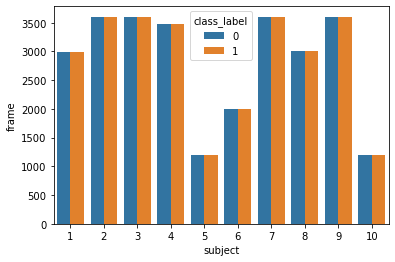

In [74]:
sns.barplot(x='subject',y='frame',data=df_balanced_count,hue='class_label')

#### visualize balanced identical fps data

In [75]:
df_identical_balanced_count = df_identical_balanced.groupby(['subject','class_label']).count().reset_index()

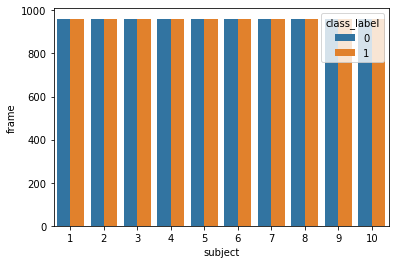

In [76]:
sns.barplot(x='subject',y='frame',data=df_identical_balanced_count,hue='class_label')

## Data Preparation for ANN

#### get data

In [77]:
df_ann = df_balanced[df_balanced.columns[2:]]

In [78]:
df_ann.head()

,class_label,rEar_norm,lEar_norm,mar_norm,calc_eye_state,calc_mouth_state,perclos,microsleep_rate,yawning_rate,mean_rEar,mean_lEar,mean_mar,std_rEar,std_lEar,std_mar
0,0,0.522064,0.441550,0.125197,1,0,0.031452,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
1,0,0.518227,0.430843,0.122614,1,0,0.031452,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
2,0,0.470524,0.406359,0.118601,1,0,0.031452,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
3,0,0.530129,0.420594,0.121653,1,0,0.031229,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271
4,0,0.501878,0.396268,0.118319,1,0,0.031229,0.0,0.0,0.29129,0.291249,0.038115,0.055507,0.055657,0.066271


#### shuffle data

In [79]:
df_ann = df_ann.sample(frac=1).reset_index(drop=True)

In [80]:
df_ann.head()

,class_label,rEar_norm,lEar_norm,mar_norm,calc_eye_state,calc_mouth_state,perclos,microsleep_rate,yawning_rate,mean_rEar,mean_lEar,mean_mar,std_rEar,std_lEar,std_mar
0,1,0.464136,0.342630,0.120449,1,0,0.157222,0.005556,0.0,0.331725,0.365555,0.025425,0.029387,0.030480,0.008728
1,0,0.491711,0.387698,0.055279,1,0,0.037037,0.000000,0.0,0.331725,0.365555,0.025425,0.029387,0.030480,0.008728
2,0,0.422263,0.378843,0.070812,1,0,0.023867,0.000000,0.0,0.298865,0.293354,0.080800,0.069526,0.067990,0.131152
3,1,0.491918,0.392713,0.062029,1,0,0.177593,0.000000,0.0,0.331725,0.365555,0.025425,0.029387,0.030480,0.008728
4,1,0.497545,0.416607,0.062938,1,0,0.138804,0.000000,0.0,0.255562,0.297604,0.037324,0.031327,0.037948,0.030768


In [81]:
df_ann.groupby('class_label').count()

,rEar_norm,lEar_norm,mar_norm,calc_eye_state,calc_mouth_state,perclos,microsleep_rate,yawning_rate,mean_rEar,mean_lEar,mean_mar,std_rEar,std_lEar,std_mar
class_label,,,,,,,,,,,,,,
0,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267
1,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267,28267


#### split data

In [26]:
SPLIT_RATIO = 0.8

In [27]:
length = len(df_ann)

In [28]:
split_index = int(0.8*length)

In [29]:
print(f"from a total of {length}, data is split by {SPLIT_RATIO} ratio into {split_index} train data and {length-split_index} test data")

from a total of 56534, data is split by 0.8 ratio into 45227 train data and 11307 test data


In [30]:
train = df_ann.iloc[:split_index].values
test = df_ann.iloc[split_index:].values

#### seperate into x and y

In [31]:
def ann_xy_separator(data):
    X = []
    y = []
    for row in data:
        X.append(row[1:])
        y.append(int(row[0]))
    return np.array(X), np.array(y)

In [32]:
X_train, y_train = ann_xy_separator(train)
X_test, y_test = ann_xy_separator(test)

#### data spotlight

In [33]:
X_train[20]

array([0.47218361, 0.38606914, 0.06274783, 1.        , 0.        ,
       0.17874952, 0.        , 0.        , 0.25556203, 0.29760351,
       0.03732381, 0.03132706, 0.03794775, 0.03076791])

In [34]:
y_train[20]

0

#### save data

In [35]:
filePath = f'dataset/{time.time()}-ann'

In [36]:
# np.save(file=f'{filePath}-X_train', arr=X_train)
# np.save(file=f'{filePath}-y_train', arr=y_train)
# np.save(file=f'{filePath}-X_test', arr=X_test)
# np.save(file=f'{filePath}-y_test', arr=y_test)

## Data Preparation for LSTM

**Data for LSTM is difference with data for ANN**. ANN required one frame for input at a time, while **LSTM requuired sequential collection of frame** for an input at a time. So first we need to sequentialize the data. the **window of sequentiial data is one minutes**

In [37]:
MINUTES_LENGTH = 1
FPS = 8
SEQ_LEN = int(FPS * 60 * MINUTES_LENGTH)

#### defince function to make a sequencial window

In [38]:
def sequencialize(df, seq_len, label):
    sequential_data = []
    prev = deque(maxlen=seq_len)
    for row in df.values:
        prev.append([data for data in row[3:]])
        if len(prev) == seq_len:
            sequential_data.append([np.array(prev),label])
    return sequential_data

#### get data

In [39]:
seq_datas = []

In [40]:
for subject, df_subject in df_identical_balanced.groupby('subject'):
    for class_label, df_class in df_subject.groupby('class_label'):
        _df = pd.DataFrame(df_class)
        seq_data = sequencialize(_df, SEQ_LEN, class_label)
        seq_datas.extend(seq_data)

#### shuffle data

In [41]:
random.shuffle(seq_datas)

#### split data

In [42]:
SPLIT_RATIO = 0.8

In [43]:
length = len(seq_datas)

In [44]:
split_index = int(0.8*length)

In [45]:
print(f"from a total of {length}, data is split by {SPLIT_RATIO} ratio into {split_index} train data and {length-split_index} test data")

from a total of 9640, data is split by 0.8 ratio into 7712 train data and 1928 test data


In [46]:
train = seq_datas[:split_index]
test = seq_datas[split_index:]

#### seperate into x and y

In [47]:
def lstm_xy_separator(data):
    X = []
    y = []
    for seq, label in data:
        X.append(seq)
        y.append(int(label))
    return np.array(X), np.array(y)

In [48]:
X_train, y_train = lstm_xy_separator(train)
X_test, y_test = lstm_xy_separator(test)

#### data spotlight

In [49]:
X_train[100]

array([[0.40870148, 0.327463  , 0.06374895, ..., 0.06405702, 0.0716581 ,
        0.05976451],
       [0.38920396, 0.31944393, 0.06456365, ..., 0.06405702, 0.0716581 ,
        0.05976451],
       [0.40967713, 0.31488101, 0.06326591, ..., 0.06405702, 0.0716581 ,
        0.05976451],
       ...,
       [0.43129691, 0.34480473, 0.06366017, ..., 0.06405702, 0.0716581 ,
        0.05976451],
       [0.42048961, 0.3373794 , 0.06238431, ..., 0.06405702, 0.0716581 ,
        0.05976451],
       [0.40249874, 0.32392288, 0.06453315, ..., 0.06405702, 0.0716581 ,
        0.05976451]])

In [50]:
y_train[100]

1

#### save data

In [51]:
filePath = f'dataset/{time.time()}-lstm'

In [52]:
# np.save(file=f'{filePath}-X_train', arr=X_train)
# np.save(file=f'{filePath}-y_train', arr=y_train)
# np.save(file=f'{filePath}-X_test', arr=X_test)
# np.save(file=f'{filePath}-y_test', arr=y_test)